## GReaT Example with California Housing Dataset

In [1]:
import numpy as np
import pandas as pd
import logging
from sklearn import datasets

from utils import set_logging_level
from be_great import GReaT

In [2]:
import matplotlib.pyplot as plt

In [3]:
logger = set_logging_level(logging.INFO)

### Load Data

In [4]:
data = datasets.fetch_california_housing(as_frame=True).frame
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Create GReaT Model

In [ ]:
great = GReaT("distilgpt2",                         # Name of the large language model used (see HuggingFace for more options)
              epochs=100,                           # Number of epochs to train
              save_steps=2000,                      # Save model weights every x steps
              logging_steps=50,                     # Log the loss and learning rate every x steps
              experiment_dir="trainer_california",  # Name of the directory where all intermediate steps are saved
              #lr_scheduler_type="constant",        # Specify the learning rate scheduler 
              #learning_rate=5e-5                   # Set the inital learning rate
             )

### Start Training

In [ ]:
trainer = great.fit(data)

In [ ]:
loss_hist = trainer.state.log_history.copy()
loss_hist.pop()

In [ ]:
loss = [x["loss"] for x in loss_hist]
epochs = [x["epoch"] for x in loss_hist]

In [ ]:
plt.plot(epochs, loss)

### Save Model

In [ ]:
great.save("california")

### Load Model

In [ ]:
# great = GReaT.load_from_dir("california")

### Generate Samples

In [ ]:
n_samples = 100

In [ ]:
samples = great.sample(n_samples, k=25)

In [ ]:
samples.head()

In [ ]:
samples.to_csv("california_samples.csv")

## Plot Data

Original Data

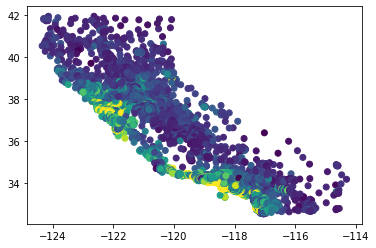

In [5]:
plt.scatter(data["Longitude"], data["Latitude"], c=data["MedHouseVal"])

Generated samples

In [ ]:
#samples = pd.read_csv("california_samples.csv")

In [ ]:
plt.scatter(samples["Longitude"], samples["Latitude"], c=samples["MedHouseVal"])